In [1]:
import pandas as pd
import numpy as np
from numpy.random import randn

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import plot_importance
from lightgbm import LGBMClassifier
import xgboost as xgb
from lightgbm import plot_importance
from lightgbm import plot_importance

from scipy.stats import chi2_contingency
import scipy.stats as stats 
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.api import qqplot, add_constant
from statsmodels.api import Logit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportions_ztest

from subprocess import call
from IPython.display import Image
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from yellowbrick.cluster import SilhouetteVisualizer

import graphviz
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.tree import export_graphviz
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.feature_selection import chi2
from sklearn.inspection import permutation_importance

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import silhouette_samples, silhouette_score
from imblearn.over_sampling import SMOTE

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

import warnings
warnings.filterwarnings('ignore')

matplotlib.rc('font', family = 'NanumBarunGothic')
matplotlib.rc('axes', unicode_minus = False)

In [2]:
df_merged = pd.read_csv("/home/piai/merged_with_2.csv", encoding = 'euc-kr')

In [4]:
df_merged.shape

(15390, 56)

In [5]:
df_merged['Ox_Chamber'] = df_merged['Ox_Chamber'].astype(str)
df_merged['Lot_Num'] = df_merged['Lot_Num'].astype(str)
df_merged['Wafer_Num'] = df_merged['Wafer_Num'].astype(str)

df_merged['photo_soft_Chamber'] = df_merged['photo_soft_Chamber'].astype(str)

df_merged['lithography_Chamber'] = df_merged['lithography_Chamber'].astype(str)
df_merged['Wavelength'] = df_merged['Wavelength'].astype(str)

df_merged['Etching_Chamber'] = df_merged['Etching_Chamber'].astype(str)

# Flux480s, Flux840s, RTA_Temp 이산형 확인 .astype('category')
df_merged['Chamber_Num'] = df_merged['Chamber_Num'].astype(str)

df_merged['wafer_defect'] = df_merged['wafer_defect'].astype('category')
df_merged['Line_CD_state'] = df_merged['Line_CD_state'].astype('category')
df_merged['thickness_state'] = df_merged['thickness_state'].astype('category')

In [6]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 56 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ox_Chamber           15390 non-null  object  
 1   type                 15390 non-null  object  
 2   Temp_OXid            15390 non-null  float64 
 3   Vapor                15390 non-null  object  
 4   ppm                  15390 non-null  float64 
 5   Pressure             15390 non-null  float64 
 6   Oxid_time            15390 non-null  float64 
 7   thickness            15390 non-null  float64 
 8   Lot_Num              15390 non-null  object  
 9   Wafer_Num            15390 non-null  object  
 10  photo_soft_Chamber   15390 non-null  object  
 11  resist_target        15390 non-null  float64 
 12  N2_HMDS              15390 non-null  float64 
 13  pressure_HMDS        15390 non-null  float64 
 14  temp_HMDS            15390 non-null  float64 
 15  temp_HMDS_bake     

In [7]:
# # 숫자형 피처만 필터링
# numerical_features = df_merged.select_dtypes(include=['int64', 'float64']).columns

# anova_results = {}
# for feature in numerical_features:
#     feature_values = df_merged[feature]
    
#     p_values = []
#     for other_feature in numerical_features:
#         if other_feature != feature:
#             other_values = df_merged[other_feature]
#             try:
#                 # ANOVA 수행
#                 f_stat, p_value = f_oneway(feature_values, other_values)
#                 p_values.append((min(feature, other_feature), max(feature, other_feature), p_value))
#             except Exception as e:
#                 print(f"Error processing feature {feature} with {other_feature}: {e}")
#                 p_values.append((min(feature, other_feature), max(feature, other_feature), None))
    
#     # 피처별 ANOVA 결과를 데이터프레임에 추가
#     anova_results[feature] = p_values

# # 유의하지 않은 결과만 필터링 (p-value > 0.05)
# non_significant_results = []
# for feature, results in anova_results.items():
#     for f1, f2, p_value in results:
#         if p_value is not None and p_value > 0.05:
#             non_significant_results.append((f1, f2, p_value))

# # 중복 제거 (정렬된 피처 쌍에 대한 중복 제거)
# non_significant_results = list(set(non_significant_results))

# # 결과를 p-value 기준으로 오름차순 정렬
# non_significant_results_sorted = sorted(non_significant_results, key=lambda x: x[2])

# # 결과 데이터프레임 생성 및 출력 - Non-significant Results (p-value > 0.05):
#   Feature 1          Feature 2   p-value
# 0    Target  Temp_implantation  0.255976
# non_significant_df = pd.DataFrame(non_significant_results_sorted, columns=['Feature 1', 'Feature 2', 'p-value'])
# print("\nANOVA - Non-significant Results (p-value > 0.05):")
# print(non_significant_df)

In [8]:
# # 숫자형 피처만 필터링
# numerical_features = df_merged.select_dtypes(include=['int64', 'float64']).columns

# t_test_results = {}
# for feature in numerical_features:
#     feature_values = df_merged[feature]
    
#     p_values = []
#     for other_feature in numerical_features:
#         if other_feature != feature:
#             other_values = df_merged[other_feature]
#             try:
#                 # t-검정 수행
#                 t_stat, p_value = ttest_ind(feature_values, other_values, nan_policy='omit')
#                 p_values.append((min(feature, other_feature), max(feature, other_feature), p_value))
#             except Exception as e:
#                 print(f"Error processing feature {feature} with {other_feature}: {e}")
#                 p_values.append((min(feature, other_feature), max(feature, other_feature), None))
    
#     # 피처별 t-검정 결과를 데이터프레임에 추가
#     t_test_results[feature] = p_values

# # 유의하지 않은 결과만 필터링 (p-value > 0.05)
# non_significant_results = []
# for feature, results in t_test_results.items():
#     for f1, f2, p_value in results:
#         if p_value is not None and p_value > 0.05:
#             non_significant_results.append((f1, f2, p_value))

# # 중복 제거 (정렬된 피처 쌍에 대한 중복 제거)
# non_significant_results = list(set(non_significant_results))

# # 결과를 p-value 기준으로 오름차순 정렬
# non_significant_results_sorted = sorted(non_significant_results, key=lambda x: x[2])

# # 결과 데이터프레임 생성 및 출력
# non_significant_df = pd.DataFrame(non_significant_results_sorted, columns=['Feature 1', 'Feature 2', 'p-value'])
# print("\nT-test - Non-significant Results (p-value > 0.05) sorted by p-value:")
# print(non_significant_df)

In [9]:
# def chi2_statistic_and_pvalue(confusion_matrix):
#     chi2_stat, p_value, _, _ = chi2_contingency(confusion_matrix, correction=False)
#     return chi2_stat, p_value

# # 범주형 피처만 필터링
# categorical_features = df_merged.select_dtypes(include=['object', 'category']).columns

# chi2_results = []
# for feature in categorical_features:
#     feature_values = df_merged[feature].dropna()
    
#     for other_feature in categorical_features:
#         if other_feature != feature:
#             other_values = df_merged[other_feature].dropna()
            
#             # 교차표 생성
#             contingency_table = pd.crosstab(feature_values, other_values)
            
#             # Ensure the table has more than one row and column
#             if contingency_table.shape[0] > 1 and contingency_table.shape[1] > 1:
#                 try:
#                     # 카이제곱 통계량과 p-value 계산
#                     chi2_stat, p_value = chi2_statistic_and_pvalue(contingency_table)
#                     chi2_results.append((feature, other_feature, chi2_stat, p_value))
#                 except Exception as e:
#                     print(f"Error processing feature {feature} with {other_feature}: {e}")
#                     chi2_results.append((feature, other_feature, None, None))
#             else:
#                 chi2_results.append((feature, other_feature, None, None))

# # 결과를 데이터프레임으로 변환
# chi2_df = pd.DataFrame(chi2_results, columns=['Feature 1', 'Feature 2', 'Chi-Square Statistic', 'p-value'])

# # Feature Pair를 기준으로 중복 제거
# chi2_df['Feature Pair'] = chi2_df.apply(lambda x: tuple(sorted([x['Feature 1'], x['Feature 2']])), axis=1)
# chi2_df = chi2_df.drop_duplicates(subset=['Feature Pair'])

# # p-value가 높은 결과만 필터링 (예: p-value > 0.05)
# chi2_df_filtered = chi2_df[chi2_df['p-value'] > 0.05]

# # p-value 기준으로 오름차순 정렬
# chi2_df_sorted = chi2_df_filtered.sort_values(by='p-value')

# # 결과 출력
# print("\nChi-Square Statistic and p-value - Results with high p-values (sorted by p-value):")
# print(chi2_df_sorted[['Feature 1', 'Feature 2', 'Chi-Square Statistic', 'p-value']])

In [10]:
df_merged.drop(columns=['ppm', 'Defective_Rate_chip', 'wafer_defect'], inplace=True)

In [11]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15390 entries, 0 to 15389
Data columns (total 53 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Ox_Chamber           15390 non-null  object  
 1   type                 15390 non-null  object  
 2   Temp_OXid            15390 non-null  float64 
 3   Vapor                15390 non-null  object  
 4   Pressure             15390 non-null  float64 
 5   Oxid_time            15390 non-null  float64 
 6   thickness            15390 non-null  float64 
 7   Lot_Num              15390 non-null  object  
 8   Wafer_Num            15390 non-null  object  
 9   photo_soft_Chamber   15390 non-null  object  
 10  resist_target        15390 non-null  float64 
 11  N2_HMDS              15390 non-null  float64 
 12  pressure_HMDS        15390 non-null  float64 
 13  temp_HMDS            15390 non-null  float64 
 14  temp_HMDS_bake       15390 non-null  float64 
 15  time_HMDS_bake     

In [12]:
# 데이터프레임 정의
df_char = df_merged.select_dtypes(include="object")
df_numeric = df_merged.select_dtypes(exclude="object")

# 숫자형 데이터 표준화
scaler = StandardScaler()
np_numeric_scaled = scaler.fit_transform(df_numeric)
df_numeric_scaled = pd.DataFrame(np_numeric_scaled, columns=df_numeric.columns, index=df_numeric.index)

# 범주형 데이터 원-핫 인코딩
df_encoded = pd.get_dummies(df_char, drop_first=True)

# 최종 데이터프레임 생성
df_final = df_numeric_scaled.join(df_encoded)

In [13]:
# 타겟 변수와 설명 변수 정의
df_final['Target'] = df_merged['Target']  # 타겟 변수 추가

# 데이터 분할
df_train, df_test = train_test_split(df_final, test_size=0.3, random_state=1234)

print('Train data size : {}'.format(df_train.shape)) 
print('Test data size : {}'.format(df_test.shape))

# 타겟 변수와 설명 변수 정의
X_train = df_train.drop(columns='Target')
y_train = df_train['Target']
X_test = df_test.drop(columns='Target')
y_test = df_test['Target']

print('X_train data size : {}'.format(X_train.shape)) 
print('y_train data size : {}'.format(y_train.shape))
print('X_test data size : {}'.format(X_test.shape)) 
print('y_test data size : {}'.format(y_test.shape))

Train data size : (10773, 148)
Test data size : (4617, 148)
X_train data size : (10773, 147)
y_train data size : (10773,)
X_test data size : (4617, 147)
y_test data size : (4617,)


In [14]:
# 후진 제거법 구현
def backward_elimination(X, y, significance_level=0.05):
    variables = X.columns.tolist()
    removed_variables = []
    
    while True:
        X_with_const = sm.add_constant(X[variables])
        model = sm.OLS(y, X_with_const).fit()
        
        # p-value가 가장 높은 변수 찾기
        p_values = model.pvalues
        max_p_value = p_values.max()
        
        if max_p_value > significance_level:
            # p-value가 가장 높은 변수 제거
            excluded_variable = p_values.idxmax()
            if excluded_variable == 'const':
                break
            variables.remove(excluded_variable)
            removed_variables.append(excluded_variable)
            print(f"제거된 변수: {excluded_variable} (p-value: {max_p_value:.4f})")
        else:
            break
    
    return variables

# 변수 선택
selected_variables = backward_elimination(X_train, y_train)

# 최종 모델 생성
X_train_final = sm.add_constant(X_train[selected_variables])
final_model = sm.OLS(y_train, X_train_final).fit()

# 회귀 분석 결과 출력
print("최종 모델 요약 (후진 제거법 적용 후):")
print(final_model.summary())

제거된 변수: Error_message_[['Scratch']] (p-value: 0.9947)
제거된 변수: IsWeekend (p-value: 0.9129)
제거된 변수: thickness (p-value: 0.8566)
제거된 변수: N2_HMDS (p-value: 0.8365)
제거된 변수: Wafer_Num_7 (p-value: 0.7974)
제거된 변수: Flux90s (p-value: 0.7669)
제거된 변수: Month (p-value: 0.6963)
제거된 변수: temp_HMDS (p-value: 0.6768)
제거된 변수: Lot_Num_12 (p-value: 0.5951)
제거된 변수: Lot_Num_11 (p-value: 0.7404)
제거된 변수: Lot_Num_5 (p-value: 0.6686)
제거된 변수: Wafer_Num_34 (p-value: 0.5677)
제거된 변수: Error_message_[['Random']] (p-value: 0.4945)
제거된 변수: photoresist_bake (p-value: 0.4880)
제거된 변수: Resolution (p-value: 0.4136)
제거된 변수: Error_message_[['Near-full']] (p-value: 0.4173)
제거된 변수: time_HMDS_bake (p-value: 0.3549)
제거된 변수: Pressure (p-value: 0.2934)
제거된 변수: Source_Power (p-value: 0.2994)
제거된 변수: time_softbake (p-value: 0.2896)
제거된 변수: Oxid_time (p-value: 0.2804)
제거된 변수: Lot_Num_14 (p-value: 0.2671)
제거된 변수: lithography_Chamber_2 (p-value: 0.2504)
제거된 변수: thickness_state (p-value: 0.2287)
제거된 변수: Wafer_Num_14 (p-value: 0.2238)
제거된 변

In [15]:
# # 릿지 회귀 모델 및 하이퍼파라미터 그리드 정의
# ridge_model = Ridge()
# param_grid_ridge = {
#     'alpha': [0.0001, 0.001, 0.01 ,0.1, 1.0, 10.0, 100.0]  # alpha는 정규화 강도
# }

# # 그리드 서치 설정# 타겟 변수와 설명 변수 정의
# df_final['Target'] = df_merged['Target']  # 타겟 변수 추가

# # 데이터 분할
# df_train, df_test = train_test_split(df_final, test_size=0.3, random_state=1234)

# print('Train data size : {}'.format(df_train.shape)) 
# print('Test data size : {}'.format(df_test.shape))

# # 타겟 변수와 설명 변수 정의
# X_train = df_train.drop(columns='Target')
# y_train = df_train['Target']

# X_test = df_test.drop(columns='Target')
# y_test = df_test['Target']
# grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, scoring='neg_mean_squared_error', cv=5)
# grid_search_ridge.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 성능 평가
# print(f"최적의 alpha: {grid_search_ridge.best_params_['alpha']}")
# print(f"최적의 MSE: {-grid_search_ridge.best_score_:.4f}")

# # 최적의 모델을 사용하여 테스트 데이터 평가
# best_ridge_model = grid_search_ridge.best_estimator_
# y_pred_ridge = best_ridge_model.predict(X_test)
# mse_ridge = mean_squared_error(y_test, y_pred_ridge)
# print(f"테스트 데이터 MSE (릿지 회귀): {mse_ridge:.4f}")

In [16]:
# # 라쏘 회귀 모델 및 하이퍼파라미터 그리드 정의
# lasso_model = Lasso()
# param_grid_lasso = {
#     'alpha': [0.0001, 0.001, 0.01 ,0.1, 1.0, 10.0, 100.0]  # alpha는 정규화 강도
# }

# # 그리드 서치 설정
# grid_search_lasso = GridSearchCV(estimator=lasso_model, param_grid=param_grid_lasso, scoring='neg_mean_squared_error', cv=5)
# grid_search_lasso.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 성능 평가
# print(f"최적의 alpha: {grid_search_lasso.best_params_['alpha']}")
# print(f"최적의 MSE: {-grid_search_lasso.best_score_:.4f}")

# # 최적의 모델을 사용하여 테스트 데이터 평가
# best_lasso_model = grid_search_lasso.best_estimator_
# y_pred_lasso = best_lasso_model.predict(X_test)
# mse_lasso = mean_squared_error(y_test, y_pred_lasso)
# print(f"테스트 데이터 MSE (라쏘 회귀): {mse_lasso:.4f}")

In [17]:
# # 엘라스틱넷 회귀 모델 및 하이퍼파라미터 그리드 정의
# elastic_net_model = ElasticNet()
# param_grid_en = {
#     'alpha': [0.0001, 0.001, 0.01 ,0.1, 1.0, 10.0, 100.0],  # alpha는 정규화 강도
#     'l1_ratio': [0.1, 0.5, 0.9]  # l1_ratio는 L1과 L2의 비율
# }

# # 그리드 서치 설정
# grid_search_en = GridSearchCV(estimator=elastic_net_model, param_grid=param_grid_en, scoring='neg_mean_squared_error', cv=5)
# grid_search_en.fit(X_train, y_train)

# # 최적의 하이퍼파라미터와 성능 평가
# print(f"최적의 alpha: {grid_search_en.best_params_['alpha']}")
# print(f"최적의 l1_ratio: {grid_search_en.best_params_['l1_ratio']}")
# print(f"최적의 MSE: {-grid_search_en.best_score_:.4f}")

# # 최적의 모델을 사용하여 테스트 데이터 평가
# best_en_model = grid_search_en.best_estimator_
# y_pred_en = best_en_model.predict(X_test)
# mse_en = mean_squared_error(y_test, y_pred_en)
# print(f"테스트 데이터 MSE (엘라스틱넷 회귀): {mse_en:.4f}")

In [18]:
# 릿지 회귀 모델 생성 및 학습
ridge_model = Ridge(alpha=0.0001, random_state=1234)  # alpha는 정규화 강도를 조절하는 하이퍼파라미터입니다.
ridge_model.fit(X_train, y_train)

# 예측
y_pred = ridge_model.predict(X_test)

# 성능 평가
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R^2 Score: {r2:.4f}")

# 모델의 계수 출력
coefficients = pd.Series(ridge_model.coef_, index=X_train.columns)
print("\nRidge 회귀 계수:")
print(coefficients.sort_values(ascending=False))

Mean Squared Error: 1006.0404
R^2 Score: 0.7674

Ridge 회귀 계수:
Lot_Num_21                       50.455185
Lot_Num_20                       46.255565
Lot_Num_23                       41.642729
Lot_Num_22                       36.637933
Lot_Num_25                       34.485454
                                   ...    
Wafer_Num_51                    -24.481079
Wafer_Num_46                    -26.216527
Wafer_Num_38                    -28.074547
Error_message_[['Edge-Ring']]   -43.697770
Error_message_none              -90.360687
Length: 147, dtype: float64


In [19]:
# 라쏘 회귀 모델 생성 및 학습
lasso_model = Lasso(alpha=0.0001, random_state=1234)  # alpha는 정규화 강도를 조절하는 하이퍼파라미터입니다.
lasso_model.fit(X_train, y_train)

# 예측
y_pred_lasso = lasso_model.predict(X_test)

# 성능 평가
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"라쏘 회귀 - Mean Squared Error: {mse_lasso:.4f}")
print(f"라쏘 회귀 - R^2 Score: {r2_lasso:.4f}")

# 모델의 계수 출력
coefficients_lasso = pd.Series(lasso_model.coef_, index=X_train.columns)
print("\n라쏘 회귀 계수:")
print(coefficients_lasso.sort_values(ascending=False))

라쏘 회귀 - Mean Squared Error: 1005.9378
라쏘 회귀 - R^2 Score: 0.7675

라쏘 회귀 계수:
Lot_Num_21                       50.374545
Lot_Num_20                       46.170433
Lot_Num_23                       41.562891
Lot_Num_22                       36.550412
Lot_Num_25                       34.399735
                                   ...    
Wafer_Num_51                    -24.185514
Wafer_Num_46                    -25.919435
Wafer_Num_38                    -27.780209
Error_message_[['Edge-Ring']]   -43.599072
Error_message_none              -90.375562
Length: 147, dtype: float64


In [20]:
# 엘라스틱넷 회귀 모델 생성 및 학습
elastic_net_model = ElasticNet(alpha=0.0001, l1_ratio=0.9, random_state=1234)  # alpha는 정규화 강도, l1_ratio는 L1과 L2의 비율
elastic_net_model.fit(X_train, y_train)

# 예측
y_pred_en = elastic_net_model.predict(X_test)

# 성능 평가
mse_en = mean_squared_error(y_test, y_pred_en)
r2_en = r2_score(y_test, y_pred_en)

print(f"엘라스틱넷 회귀 - Mean Squared Error: {mse_en:.4f}")
print(f"엘라스틱넷 회귀 - R^2 Score: {r2_en:.4f}")

# 모델의 계수 출력
coefficients_en = pd.Series(elastic_net_model.coef_, index=X_train.columns)
print("\n엘라스틱넷 회귀 계수:")
print(coefficients_en.sort_values(ascending=False))

엘라스틱넷 회귀 - Mean Squared Error: 1005.8241
엘라스틱넷 회귀 - R^2 Score: 0.7675

엘라스틱넷 회귀 계수:
Lot_Num_21                       50.141968
Lot_Num_20                       45.940965
Lot_Num_23                       41.341265
Lot_Num_22                       36.315892
Lot_Num_25                       34.191062
                                   ...    
Wafer_Num_51                    -23.805444
Wafer_Num_46                    -25.530923
Wafer_Num_38                    -27.389980
Error_message_[['Edge-Ring']]   -43.151548
Error_message_none              -90.245243
Length: 147, dtype: float64


In [21]:
# param_grid = {
#         'max_depth': [i for i in range(1,7)],
#         'min_samples_split': [i*10 for i in range(3,8)],
#         'min_samples_leaf': [i*5 for i in range(2,5)]}

# dt_reg = DecisionTreeRegressor()
# grid_search = GridSearchCV(estimator=dt_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_dt_reg = grid_search.best_estimator_
# best_params = best_dt_reg.get_params()
# print("Best Hyperparameters:", best_params)

In [22]:
# param_grid = {
#         'n_estimators': [50, 100, 200],
#         'max_depth': [i for i in range(1,7)],
#         'min_samples_split': [i*10 for i in range(3,8)],
#         'min_samples_leaf': [i*5 for i in range(2,5)]}

# rf_reg = RandomForestRegressor(random_state=1234)
# grid_search = GridSearchCV(estimator=rf_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_rf_reg = grid_search.best_estimator_
# best_params = best_rf_reg.get_params()
# print("Best Hyperparameters:", best_params)

In [23]:
# param_grid = {
#         'n_estimators': [100, 200, 300],
#         'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]}

# gb_reg = GradientBoostingRegressor(random_state=1234)
# grid_search = GridSearchCV(estimator=gb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_gb_reg = grid_search.best_estimator_
# best_params = best_gb_reg.get_params()
# print("Best Hyperparameters:", best_params)

In [25]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]}

xgb_model = xgb.XGBRegressor(random_state=1234)
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_gb_reg = grid_search.best_estimator_
best_params = best_gb_reg.get_params()
print("Best Hyperparameters:", best_params)

KeyboardInterrupt: 

In [ ]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2]}

lgb_model = lgb.LGBMRegressor(random_state=1234)
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_gb_reg = grid_search.best_estimator_
best_params = best_gb_reg.get_params()
print("Best Hyperparameters:", best_params)

In [26]:
# 결정 트리 회귀 모델 생성 및 학습
decision_tree_model = DecisionTreeRegressor(ccp_alpha = 0.0, criterion = 'squared_error', max_depth = 6, max_features = None, \
                                            max_leaf_nodes = None, min_impurity_decrease = 0.0, min_samples_leaf = 10, \
                                            min_samples_split = 30, min_weight_fraction_leaf = 0.0, random_state = 1234, splitter = 'best')
decision_tree_model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred_dt = decision_tree_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f"테스트 데이터 MSE (결정 트리 회귀): {mse_dt:.4f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Error_message_[['Edge-Loc']]
- Error_message_[['Edge-Ring']]
- Error_message_[['Loc']]
- Error_message_[['Near-full']]
- Error_message_[['Random']]
- ...
Feature names seen at fit time, yet now missing:
- Error_message_'Edge-Loc'
- Error_message_'Edge-Ring'
- Error_message_'Loc'
- Error_message_'Near-full'
- Error_message_'Random'
- ...


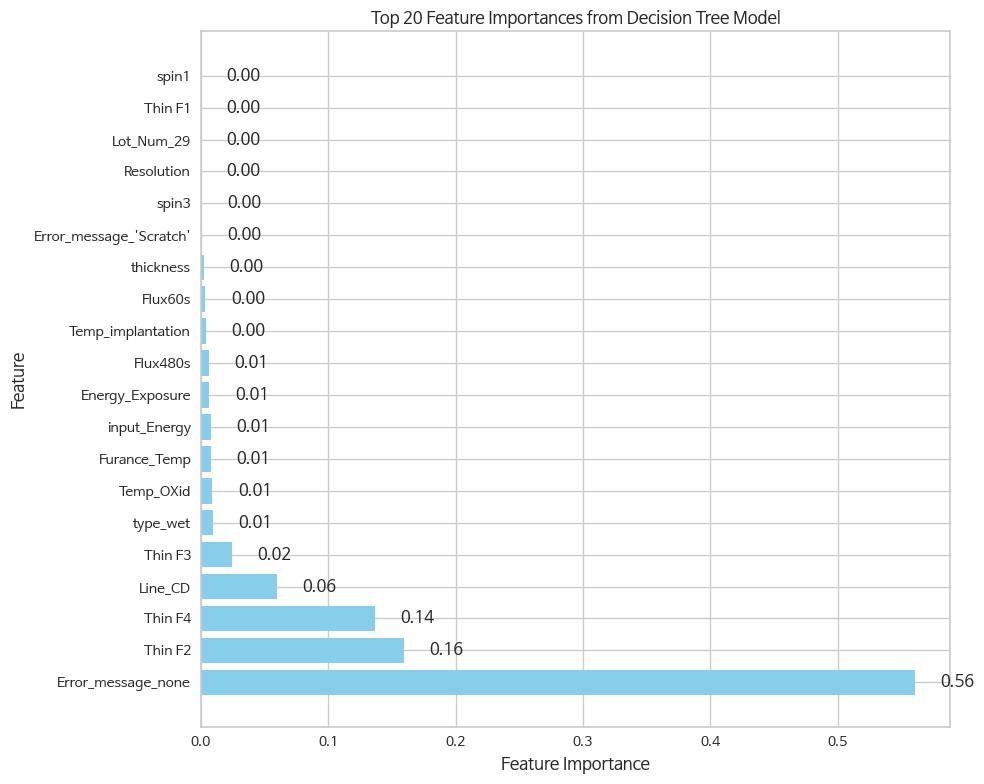

In [29]:
# 피처 중요도 시리즈 생성
feature_importances_tree = pd.Series(decision_tree_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances_tree.sort_values(ascending=False)

# 상위 20개의 피처만 선택
top_20_importances = sorted_importances.head(20)

# 수평 바 차트 생성
plt.figure(figsize=(10, 8))
bars = plt.barh(top_20_importances.index, top_20_importances.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 20 Feature Importances from Decision Tree Model')

# 각 막대 옆에 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.tight_layout()
plt.show()

In [28]:
# 랜덤 포레스트 회귀 모델 생성 및 학습
random_forest_model = RandomForestRegressor(bootstrap = True, ccp_alpha = 0.0, criterion = 'squared_error', max_depth = 6, \
                                            max_features = 1.0, max_leaf_nodes = None, max_samples = None, min_impurity_decrease = 0.0,\
                                            min_samples_leaf = 10, min_samples_split = 30, min_weight_fraction_leaf = 0.0,\
                                            n_estimators = 200, n_jobs = None, oob_score = False, random_state = 1234, verbose = 0, \
                                            warm_start = False)
random_forest_model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred_rf = random_forest_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f"테스트 데이터 MSE (랜덤 포레스트 회귀): {mse_rf:.4f}")

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- Error_message_[['Edge-Loc']]
- Error_message_[['Edge-Ring']]
- Error_message_[['Loc']]
- Error_message_[['Near-full']]
- Error_message_[['Random']]
- ...
Feature names seen at fit time, yet now missing:
- Error_message_'Edge-Loc'
- Error_message_'Edge-Ring'
- Error_message_'Loc'
- Error_message_'Near-full'
- Error_message_'Random'
- ...


In [ ]:
# 피처 중요도
feature_importances_forest = pd.Series(random_forest_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances_tree.sort_values(ascending=False)

# 수평 바 차트 생성
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random forest Model')

# 각 막대 옆에 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.tight_layout()
plt.show()

In [ ]:
# 그래디언트 부스팅 회귀 모델 생성 및 학습
gradient_boosting_model = GradientBoostingRegressor(alpha = 0.9, ccp_alpha = 0.0, criterion = 'friedman_mse', init = None, \
                                                    learning_rate = 0.2, loss = 'squared_error', max_depth = 6, max_features = None, \
                                                    max_leaf_nodes = None, min_impurity_decrease = 0.0, min_samples_leaf = 10, \
                                                    min_samples_split = 30, min_samples_split = 2, min_weight_fraction_leaf = 0.0, \
                                                    n_estimators = 300, n_iter_no_change = None, random_state = 1234, subsample = 1.0,\
                                                    tol = 0.0001, validation_fraction = 0.1, verbose = 0, warm_start = False)
gradient_boosting_model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred_gb = gradient_boosting_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
print(f"테스트 데이터 MSE (그래디언트 부스팅 회귀): {mse_gb:.4f}")

In [ ]:
# 피처 중요도
feature_importances_gboost = pd.Series(gradient_boosting_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances_tree.sort_values(ascending=False)

# 수평 바 차트 생성
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Gradient_boosting Model')

# 각 막대 옆에 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.tight_layout()
plt.show()

In [ ]:
# XGBoost 회귀 모델 생성 및 학습
xgb_model = xgb.XGBRegressor(n_estimators=n_estimators, learning_rate=learning_rate, max_depth=max_depth, objective='reg:squarederror')
xgb_model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred_xgb = xgb_model.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
print(f"테스트 데이터 MSE (XGBoost 회귀): {mse_xgb:.4f}")

In [ ]:
# 피처 중요도
feature_importances_xgb = pd.Series(xgb_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances_tree.sort_values(ascending=False)

# 수평 바 차트 생성
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Xgb Model')

# 각 막대 옆에 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.tight_layout()
plt.show()

In [ ]:
# LightGBM 회귀 모델 생성 및 학습
lgb_model = lgb.LGBMRegressor(n_estimators=n_estimators, learning_rate=learning_rate, num_leaves=num_leaves)
lgb_model.fit(X_train, y_train)

# 테스트 데이터 평가
y_pred_lgb = lgb_model.predict(X_test)
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"테스트 데이터 MSE (LightGBM 회귀): {mse_lgb:.4f}")

In [ ]:
# 피처 중요도
feature_importances_lgb = pd.Series(lgb_model.feature_importances_, index=X_train.columns)
sorted_importances = feature_importances_tree.sort_values(ascending=False)

# 수평 바 차트 생성
plt.figure(figsize=(10, 8))
bars = plt.barh(sorted_importances.index, sorted_importances.values, color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Lgb Model')

# 각 막대 옆에 값 표시
for bar in bars:
    plt.text(bar.get_width() + 0.02, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}', 
             va='center', ha='left')

plt.tight_layout()
plt.show()